In [1]:
import pickle
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import ast
import seaborn as sns

In [2]:
# D = pd.read_csv("../runs/0316_addition+original.csv", converters={"profile_avgProfile":ast.literal_eval})
D = pd.read_csv("../runs/full_run/0622_full_analysis.csv", converters={"Float64profile":ast.literal_eval})
D

,potential,dnn,dim,s,d,energySMSE,Float64profile
0,glb,2.0,56.568542,0.01,-0.5,0.016112,"[65.92307692307692, 18.076923076923077, 8.5384..."
1,glb,2.0,56.568542,0.01,-1.0,0.035901,"[71.15384615384616, 18.46153846153846, 7.76923..."
2,glb,2.0,56.568542,0.01,-1.5,0.060064,"[67.46153846153847, 19.0, 8.538461538461538, 5..."
3,glb,2.0,56.568542,0.01,-2.0,0.076791,"[66.07692307692308, 17.384615384615383, 8.0, 5..."
4,glb,2.0,56.568542,0.01,-2.5,0.097761,"[68.53846153846153, 17.46153846153846, 7.46153..."
...,...,...,...,...,...,...,...
1678,glb,2.0,56.568542,0.75,2.0,6.420487,"[89.3076923076923, 37.84615384615385, 22.23076..."
1679,glb,2.0,56.568542,0.75,2.5,1.471056,"[85.3076923076923, 39.0, 23.46153846153846, 16..."
1680,glb,2.0,56.568542,0.75,3.0,0.927519,"[86.84615384615384, 36.15384615384615, 21.4615..."
1681,glb,2.0,56.568542,0.75,3.5,2.920095,"[87.84615384615384, 35.61538461538461, 20.5384..."


In [3]:
def cps(profile):
    return sum( [np.log2(x)/(i+1) if x > 1 else 0 for i, x in enumerate(profile)] ) # in paper 10/3/22
    
AD = D.copy()
AD["cps"] = AD["Float64profile"].apply(cps)
AD

,potential,dnn,dim,s,d,energySMSE,Float64profile,cps
0,glb,2.0,56.568542,0.01,-0.5,0.016112,"[65.92307692307692, 18.076923076923077, 8.5384...",10.788983
1,glb,2.0,56.568542,0.01,-1.0,0.035901,"[71.15384615384616, 18.46153846153846, 7.76923...",10.400876
2,glb,2.0,56.568542,0.01,-1.5,0.060064,"[67.46153846153847, 19.0, 8.538461538461538, 5...",11.166689
3,glb,2.0,56.568542,0.01,-2.0,0.076791,"[66.07692307692308, 17.384615384615383, 8.0, 5...",10.914610
4,glb,2.0,56.568542,0.01,-2.5,0.097761,"[68.53846153846153, 17.46153846153846, 7.46153...",10.368479
...,...,...,...,...,...,...,...,...
1678,glb,2.0,56.568542,0.75,2.0,6.420487,"[89.3076923076923, 37.84615384615385, 22.23076...",13.629591
1679,glb,2.0,56.568542,0.75,2.5,1.471056,"[85.3076923076923, 39.0, 23.46153846153846, 16...",13.675348
1680,glb,2.0,56.568542,0.75,3.0,0.927519,"[86.84615384615384, 36.15384615384615, 21.4615...",13.610012
1681,glb,2.0,56.568542,0.75,3.5,2.920095,"[87.84615384615384, 35.61538461538461, 20.5384...",13.724333


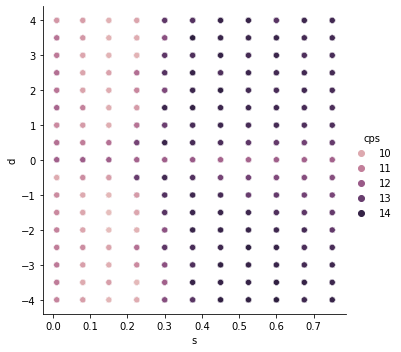

In [4]:
sns.relplot(AD, x="s", y="d", hue="cps")

,potential,dnn,dim,s,d,energySMSE,Float64profile,cps,sum
47,glb,2.0,56.568542,0.150,2.5,2.425107,"[69.53846153846153, 13.846153846153847, 4.6153...",0.640290,186.307692
396,glb,2.0,56.568542,0.080,-3.0,0.911710,"[63.07692307692308, 13.23076923076923, 4.92307...",0.649330,181.153846
50,glb,2.0,56.568542,0.150,4.0,3.962033,"[66.38461538461539, 12.615384615384615, 4.2307...",0.654914,183.769231
609,glb,2.0,56.568542,0.150,3.0,0.121171,"[69.23076923076923, 13.461538461538462, 4.7692...",0.660214,187.230769
767,glb,2.0,56.568542,0.080,-1.5,0.085032,"[62.15384615384615, 14.461538461538462, 5.6923...",0.660793,182.461538
...,...,...,...,...,...,...,...,...,...
836,glb,2.0,56.568542,0.375,-2.0,1.140509,"[67.15384615384616, 23.615384615384617, 14.307...",0.997753,200.000000
703,glb,2.0,56.568542,0.600,-3.5,15.904066,"[74.0, 28.0, 16.076923076923077, 12.3076923076...",0.998765,200.000000
687,glb,2.0,56.568542,0.525,-4.0,1.435156,"[74.0, 25.384615384615383, 15.923076923076923,...",0.999121,200.000000
461,glb,2.0,56.568542,0.375,-1.5,2.435372,"[77.38461538461539, 27.0, 15.153846153846153, ...",0.999377,200.000000


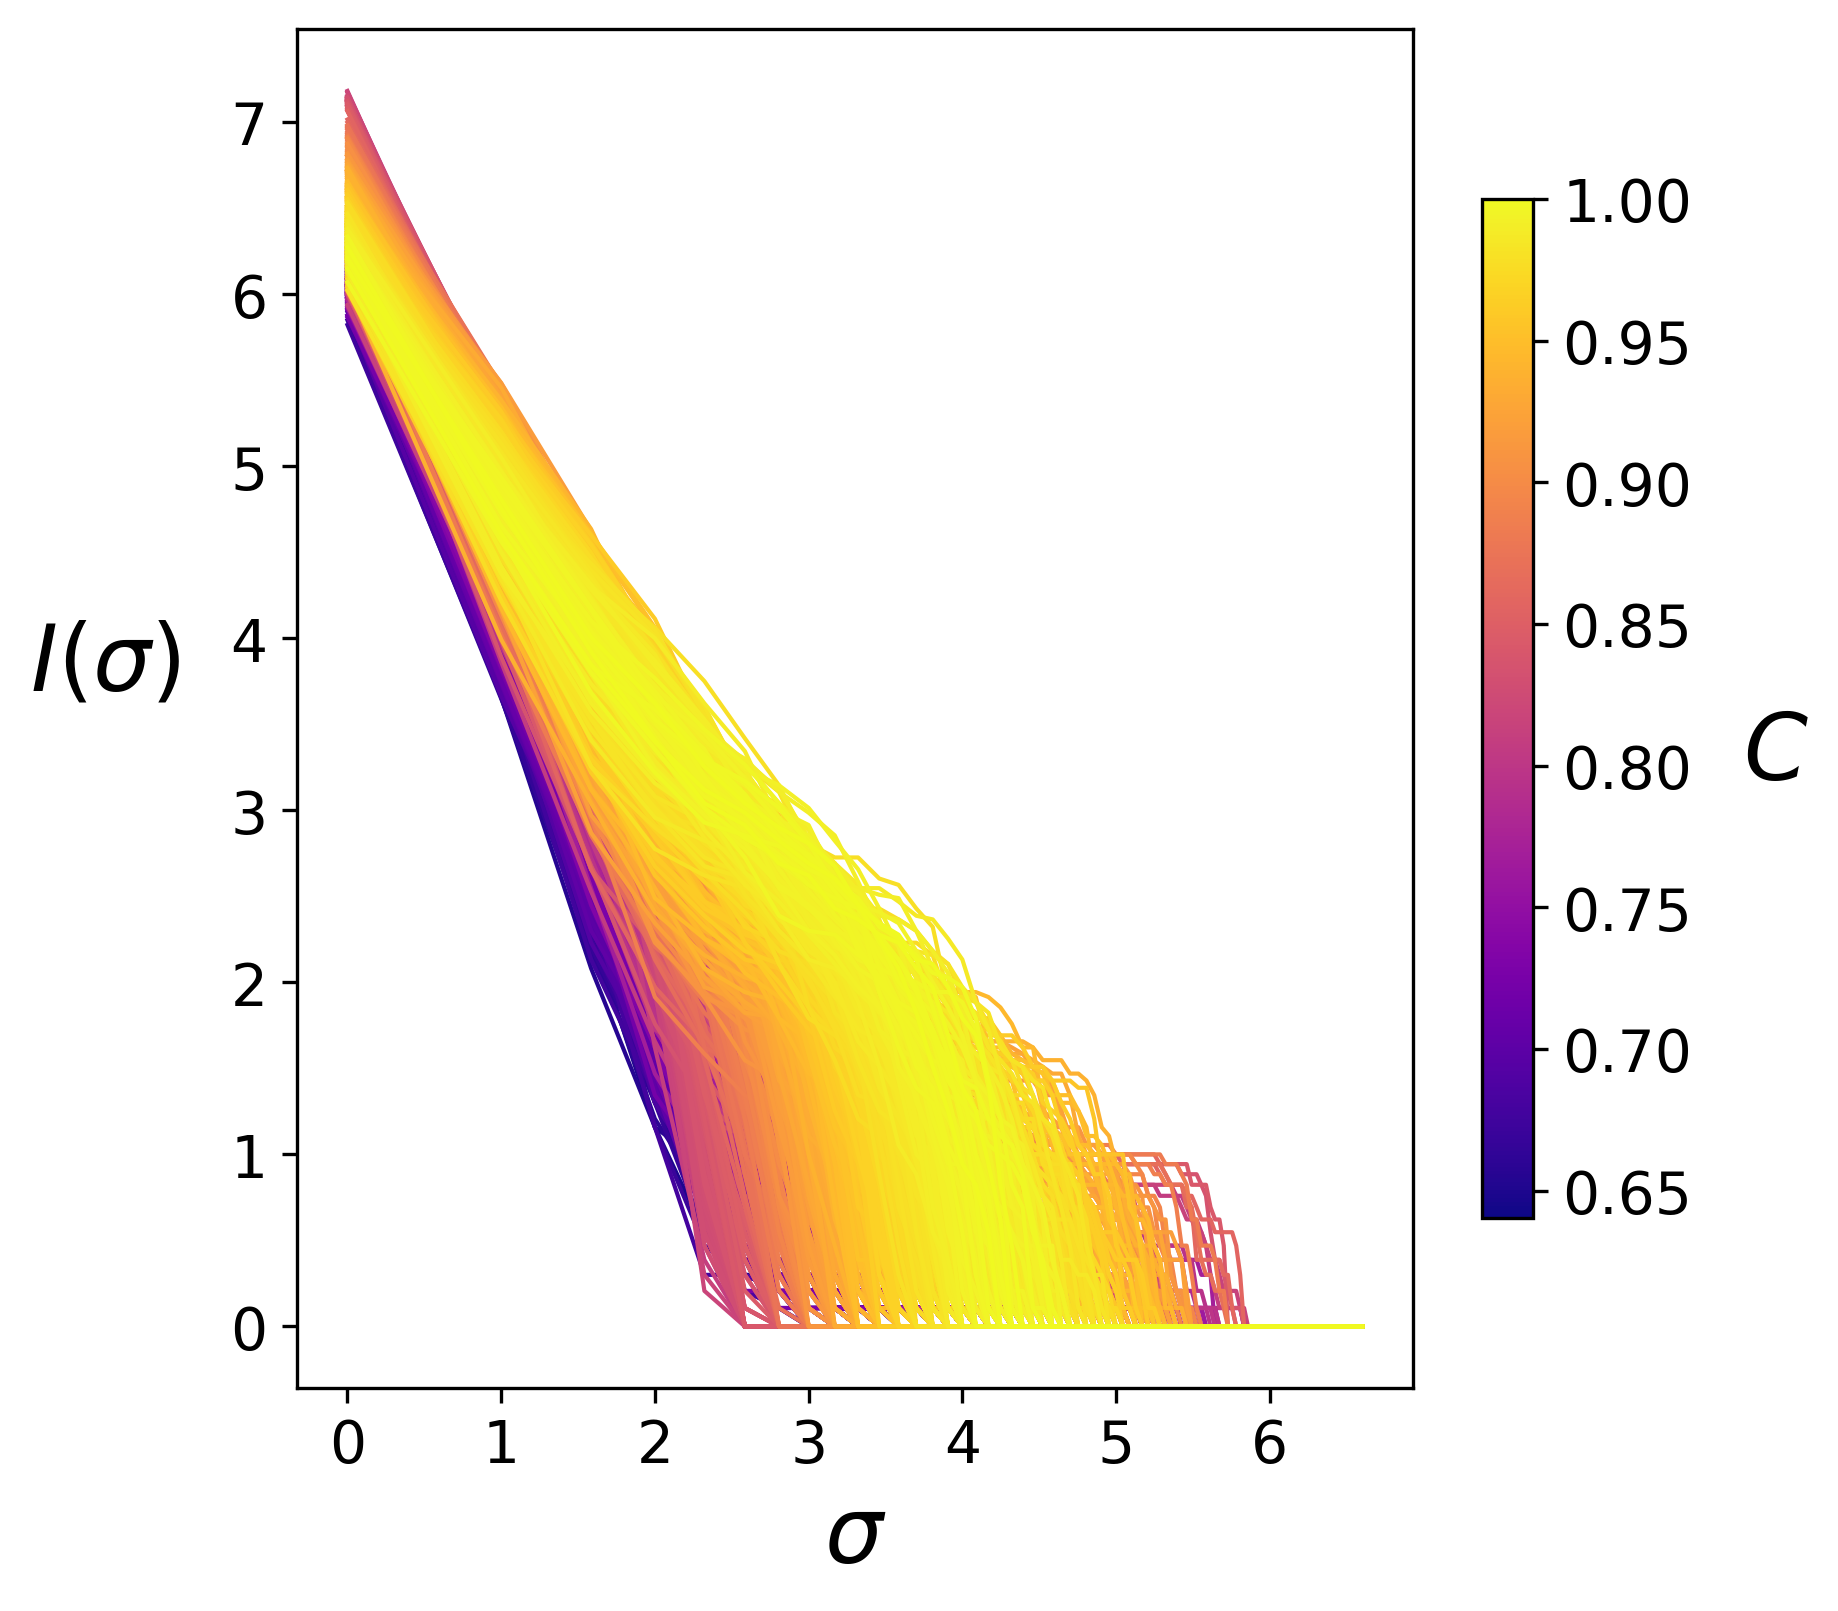

In [5]:
A = AD.copy()
B = AD.copy()
M = max(A["cps"])
A["cps"] = A["cps"].apply(lambda x:(x/M))
# B["cps"] = B["cps"].apply(lambda x:(x/M))
A["sum"] = A["Float64profile"].apply(lambda x:sum(x))
A = A.sort_values("cps")
display(A)
A.to_csv("complexity_profile.csv")

fig, ax = plt.subplots(figsize=(4,4))
color = plt.cm.plasma
norm = plt.Normalize(vmin=min(A["cps"]), vmax=max(A["cps"]))
for I, i in enumerate(A.iterrows()):
    if I % 4 == 0:
        continue
    L = i[-1]
    start = 1
    end = 98
    plt.plot(np.log2(range(start, end)), 
             [np.log2(x) if x>1 else 0 for x in L[-3][start-1:end-1]], 
             linewidth=1, 
             color=color(norm(L[-2]))
            )
    
plt.gcf().set_size_inches(6,6)
fig.set_dpi(300)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel(r"$\sigma$", fontsize=22)
ax.set_ylabel(r"$I(\sigma)$", fontsize=22, rotation=0, labelpad=30)
sm = plt.cm.ScalarMappable(cmap=color, norm=norm)
cbar = plt.gcf().colorbar(sm, shrink=0.75, ax=ax)
cbar.set_label(r"$C$", fontsize=22, rotation=0, labelpad=20)
cbar.ax.tick_params(labelsize=14) 

,potential,dnn,dim,s,d,energySMSE,Float64profile,cps,sum,s/d
1182,glb,2.0,56.568542,0.225,0.5,0.099572,"[74.15384615384616, 25.46153846153846, 12.6153...",0.974415,200.0,0.450000
640,glb,2.0,56.568542,0.300,1.5,0.210887,"[77.07692307692308, 27.46153846153846, 15.0, 1...",0.989818,200.0,0.200000
1596,glb,2.0,56.568542,0.375,3.5,1.195171,"[74.07692307692308, 25.692307692307693, 15.0, ...",0.997689,200.0,0.107143
862,glb,2.0,56.568542,0.450,2.0,2.458637,"[77.15384615384616, 30.692307692307693, 17.461...",0.992423,200.0,0.225000
695,glb,2.0,56.568542,0.525,3.5,1.855864,"[79.15384615384616, 31.307692307692307, 18.615...",0.992647,200.0,0.150000
1085,glb,2.0,56.568542,0.600,3.0,4.330454,"[81.84615384615384, 31.846153846153847, 20.153...",0.983360,200.0,0.200000
169,glb,2.0,56.568542,0.675,4.0,2.734771,"[77.38461538461539, 31.153846153846153, 19.846...",0.988987,200.0,0.168750
933,glb,2.0,56.568542,0.750,3.5,6.523667,"[86.15384615384616, 33.30769230769231, 20.3076...",0.981029,200.0,0.214286
1360,glb,2.0,56.568542,0.225,0.5,0.309848,"[72.84615384615384, 21.53846153846154, 10.8461...",0.954380,200.0,0.450000
68,glb,2.0,56.568542,0.300,0.5,3.231667,"[86.76923076923077, 30.53846153846154, 16.0, 1...",0.980738,200.0,0.600000


R2 = 0.7623582766439909
[ 6.50793651 -0.54761905]
y=6.507937x+(-0.547619)


Text(0, 0.5, '$|d|$')

<Figure size 432x288 with 0 Axes>

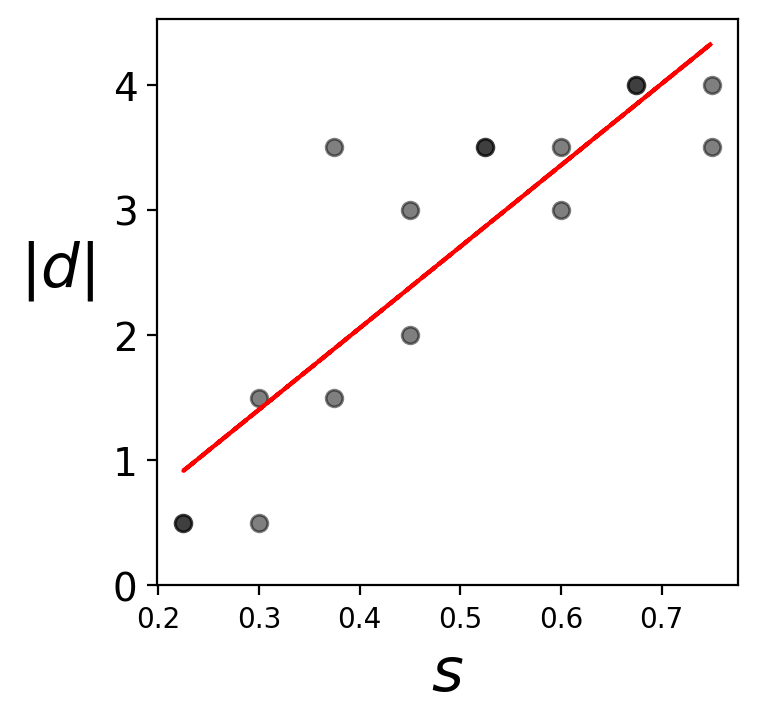

In [6]:
import numpy as np
from sklearn.metrics import r2_score
idxp = A.loc[A["d"] >= 0].groupby("s")["cps"].idxmax()
idxn = A.loc[A["d"] < 0].groupby("s")["cps"].idxmax()

R = pd.concat( [A.loc[idxp], A.loc[idxn]] )
R["d"] = R["d"].apply(np.abs)
R = R.loc[ (R["s"] >= 0.225) ]
R["s/d"] = R["s"] / R["d"]
display(R)

# calc the trendline
z = np.polyfit(list(R["s"]), list(R["d"]), 1)
p = np.poly1d(z)

yTrue = list(R["d"])
yPred = list(map(lambda x: x*z[0] + z[1], list(R["s"])))
R2 = r2_score(yTrue, yPred)
print(f"R2 = {R2}")
# the line equation:
print(z)
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

plt.clf()
fig, ax = plt.subplots()
plt.scatter(R["s"], R["d"], alpha=0.5, color="black")
plt.plot(list(R["s"]), [p(i) for i in list(R["s"])], "r--")

plt.gcf().set_size_inches(3.75,3.75)
fig.set_dpi(200)
plt.yticks([0, 1, 2, 3, 4], fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel(r"$s$", fontsize=22)
ax.set_ylabel(r"$|d|$", fontsize=22, rotation=0, labelpad=20)

In [7]:
pv = A.groupby(["s","d"]).mean().reset_index().pivot(index="d", columns="s", values="cps")
pv

s,0.010,0.080,0.150,0.225,0.300,0.375,0.450,0.525,0.600,0.675,0.750
d,,,,,,,,,,,
-4.00,0.734775,0.720390,0.698462,0.721570,0.873732,0.952722,0.978265,0.991433,0.988509,0.979837,0.977625
-3.50,0.750308,0.717741,0.696444,0.728865,0.885898,0.959257,0.973933,0.990946,0.990963,0.981344,0.973045
-3.00,0.747659,0.698398,0.706834,0.734586,0.899163,0.970998,0.984046,0.987688,0.983145,0.969939,0.969579
-2.50,0.750325,0.719123,0.698807,0.764565,0.930167,0.966495,0.976761,0.989874,0.981183,0.963879,0.953592
-2.00,0.744255,0.721552,0.696231,0.743440,0.926198,0.982953,0.987166,0.978938,0.966908,0.952503,0.931272
-1.50,0.742326,0.717899,0.692142,0.768449,0.941384,0.980471,0.983634,0.972507,0.949462,0.930096,0.913312
-1.00,0.742633,0.727723,0.715305,0.820732,0.945312,0.984512,0.964424,0.940636,0.919186,0.911139,0.896905
-0.50,0.752149,0.750112,0.754133,0.894547,0.968632,0.940857,0.915325,0.891936,0.878963,0.869434,0.871876
0.01,0.830569,0.840569,0.837087,0.832313,0.832067,0.831028,0.832244,0.828467,0.832587,0.827625,0.826711


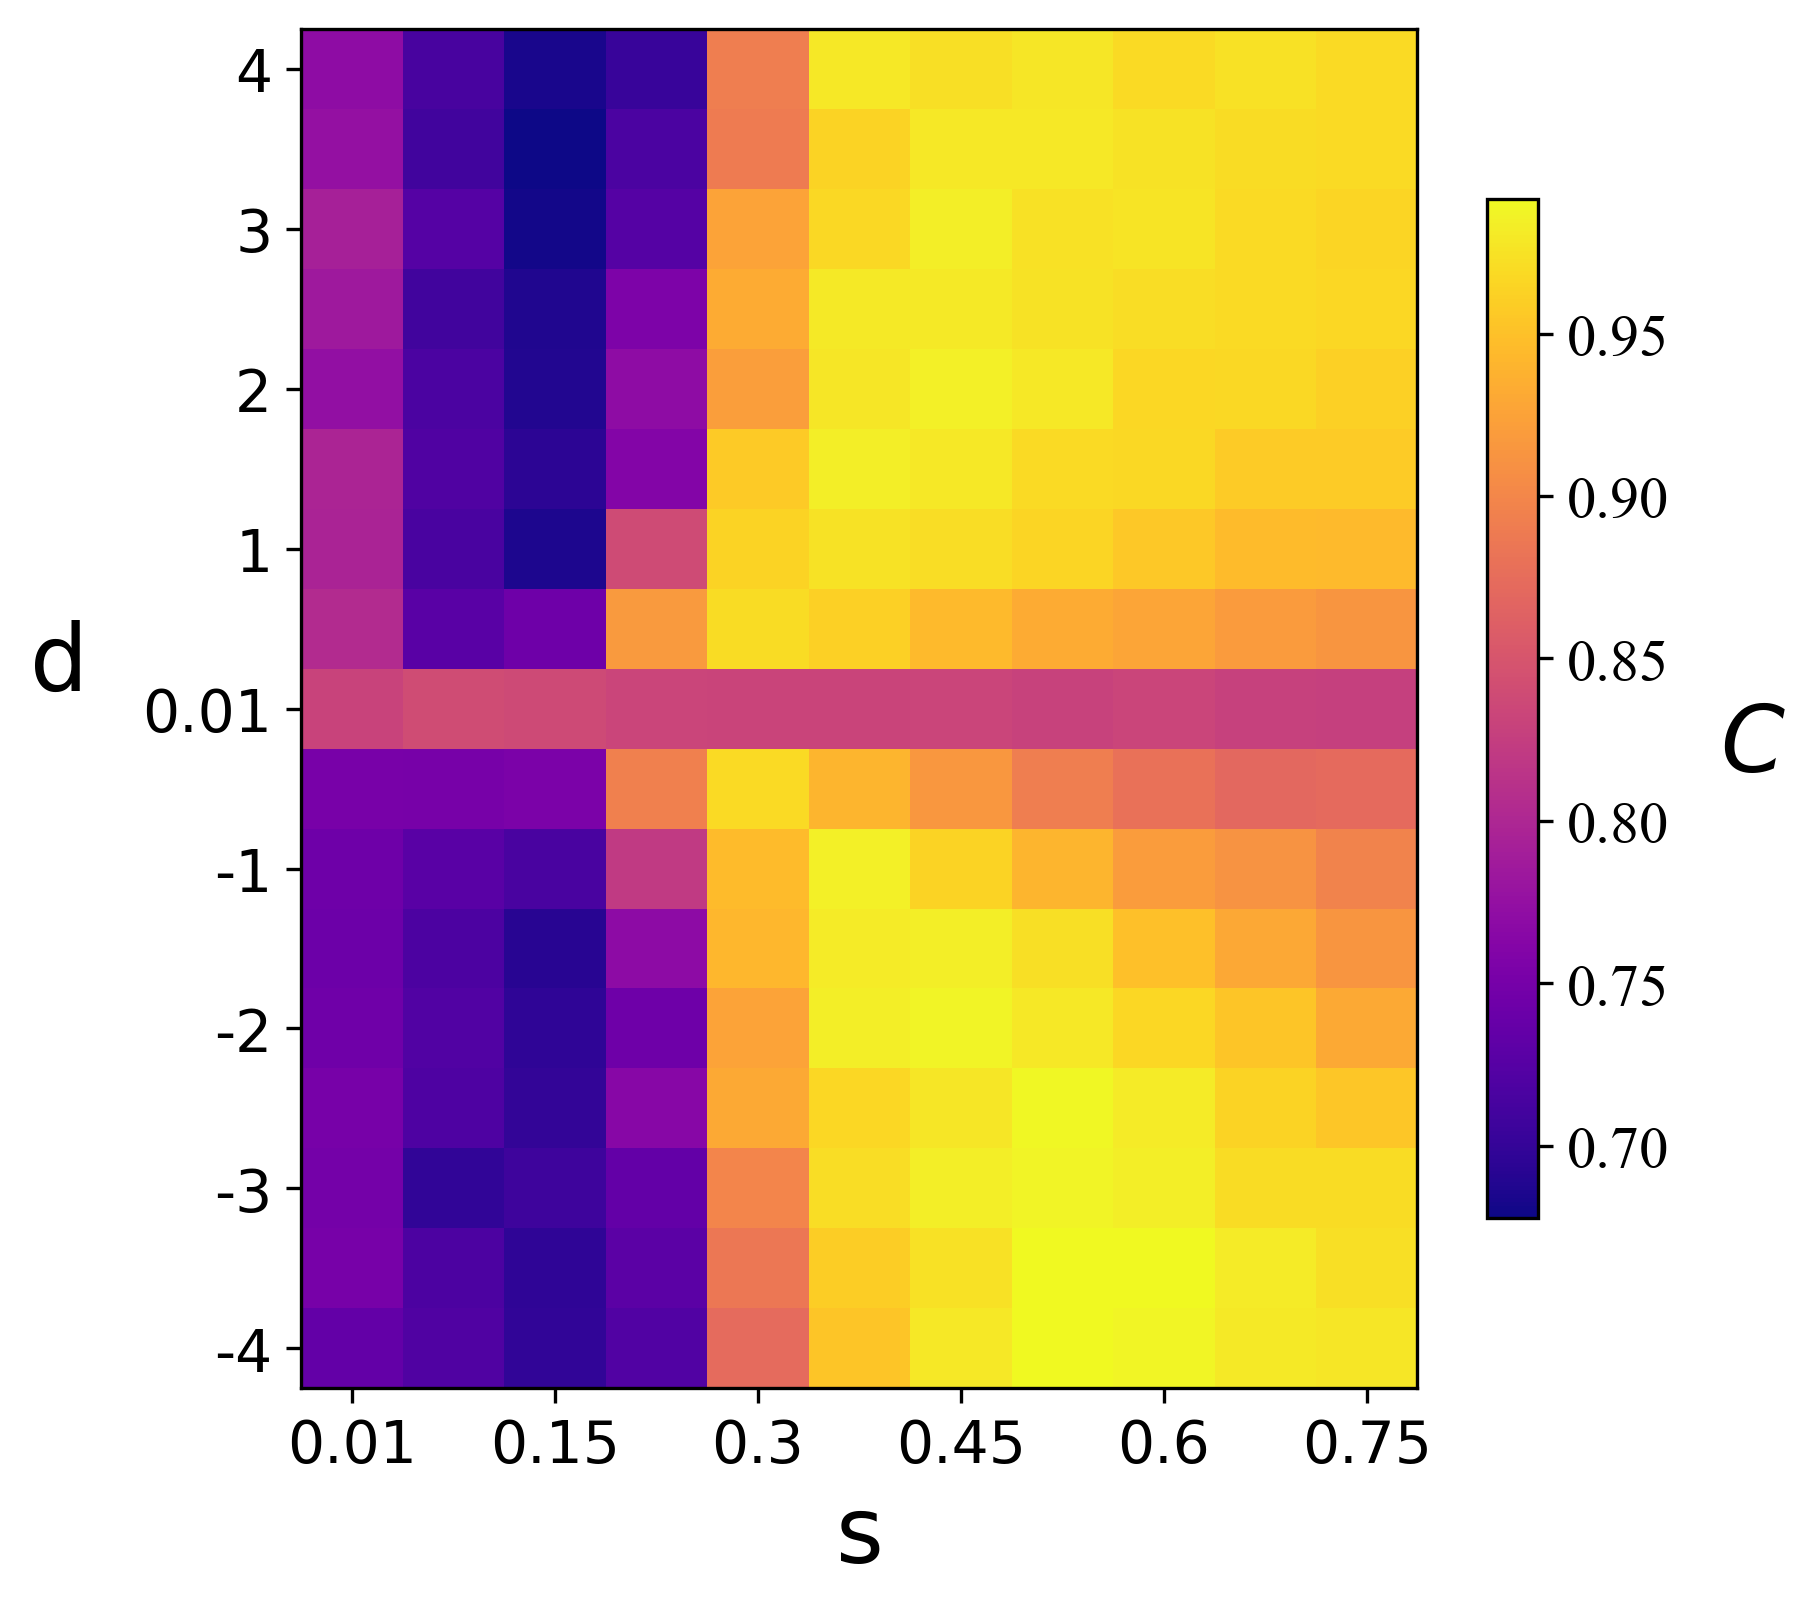

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
from matplotlib import colors
plt.rcParams["font.family"] = "Times New Roman"

ss = list(map(str, [0.01, .08, 0.15, .23, 0.3, .38, 0.45, .53, 0.6, .68, .75]))
ds = list(map(str, [-4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0.01, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]))

pos = plt.pcolormesh(ss, ds, pv, cmap=plt.cm.plasma, shading="auto")
ax.set_xlabel("s", fontsize=22)
plt.xticks([e for i, e in enumerate(ss) if i%2==0], fontsize=14)
ax.set_ylabel("d", fontsize=22, rotation="horizontal", labelpad=20)
plt.yticks([e for i, e in enumerate(ds) if i%2==0], fontsize=14)
fig.set_dpi(300)
cbar = fig.colorbar(pos, shrink=0.75)
cbar.set_label(r"$C$", fontsize=22, rotation=0, labelpad=20)
cbar.ax.tick_params(labelsize=14) 

In [9]:
for d in ds[::-1]:
    for s in ss:
        print(f"{abs(float(s)/float(d)):.04f}", end=" ")
    print()

0.0025 0.0200 0.0375 0.0575 0.0750 0.0950 0.1125 0.1325 0.1500 0.1700 0.1875 
0.0029 0.0229 0.0429 0.0657 0.0857 0.1086 0.1286 0.1514 0.1714 0.1943 0.2143 
0.0033 0.0267 0.0500 0.0767 0.1000 0.1267 0.1500 0.1767 0.2000 0.2267 0.2500 
0.0040 0.0320 0.0600 0.0920 0.1200 0.1520 0.1800 0.2120 0.2400 0.2720 0.3000 
0.0050 0.0400 0.0750 0.1150 0.1500 0.1900 0.2250 0.2650 0.3000 0.3400 0.3750 
0.0067 0.0533 0.1000 0.1533 0.2000 0.2533 0.3000 0.3533 0.4000 0.4533 0.5000 
0.0100 0.0800 0.1500 0.2300 0.3000 0.3800 0.4500 0.5300 0.6000 0.6800 0.7500 
0.0200 0.1600 0.3000 0.4600 0.6000 0.7600 0.9000 1.0600 1.2000 1.3600 1.5000 
1.0000 8.0000 15.0000 23.0000 30.0000 38.0000 45.0000 53.0000 60.0000 68.0000 75.0000 
0.0200 0.1600 0.3000 0.4600 0.6000 0.7600 0.9000 1.0600 1.2000 1.3600 1.5000 
0.0100 0.0800 0.1500 0.2300 0.3000 0.3800 0.4500 0.5300 0.6000 0.6800 0.7500 
0.0067 0.0533 0.1000 0.1533 0.2000 0.2533 0.3000 0.3533 0.4000 0.4533 0.5000 
0.0050 0.0400 0.0750 0.1150 0.1500 0.1900 0.2250 0.2650

In [10]:
data = A.copy()
# data["s"] = data["s"] / 0.8
# data["d"] = data["d"] / 4
data["s/d2"] = data["s"] / data["d"]

meanPos = data[data["d"]>0].nlargest(10, "cps")["s/d2"].mean()
meanNeg = data[data["d"]<0].nlargest(10, "cps")["s/d2"].mean()
# plt.hist(data[data["d"]<0]["cps"], bins=40)
meanPos, meanNeg

(0.15767857142857142, -0.184375)

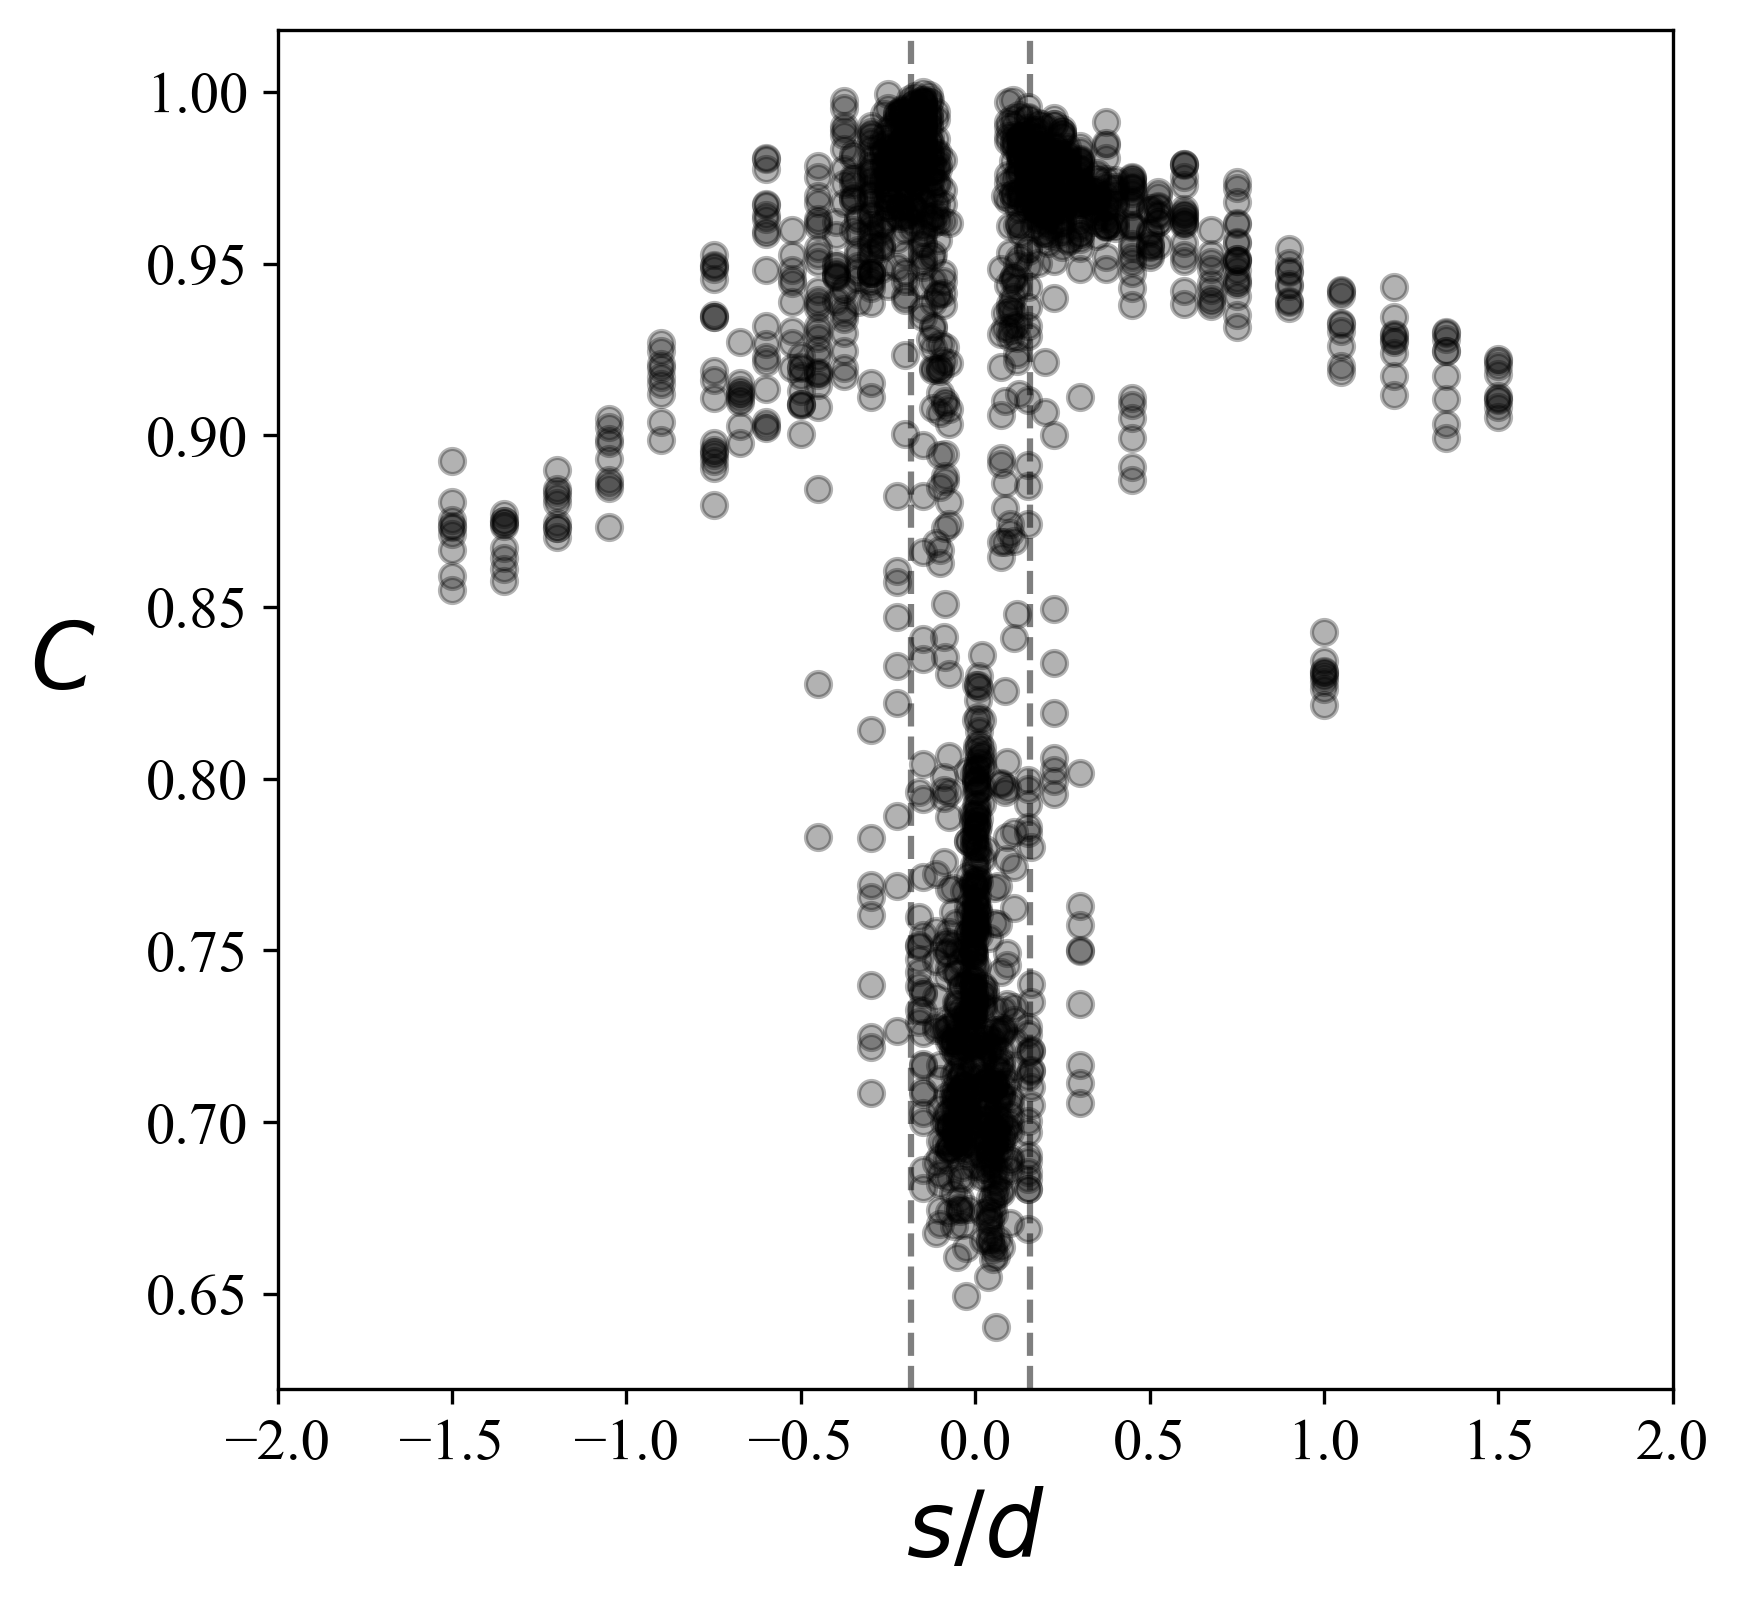

In [11]:
# plot complexity as function of ratio of s and d

fig, ax = plt.subplots(1,1, figsize=(6,6))
fig.set_dpi(300)
pos = ax.scatter(data["s/d2"], data["cps"], alpha=0.3, color="black")
plt.xlim([-2,2])
plt.xlabel(r"$s/d$", fontsize=22, labelpad=5)
plt.ylabel(r"$C$", fontsize=22, rotation=0, labelpad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(meanPos, linestyle="--", color="black", alpha=0.5)
plt.axvline(meanNeg, linestyle="--", color="black", alpha=0.5)

/tmp/ipykernel_130124/1997314537.py:3: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,2)


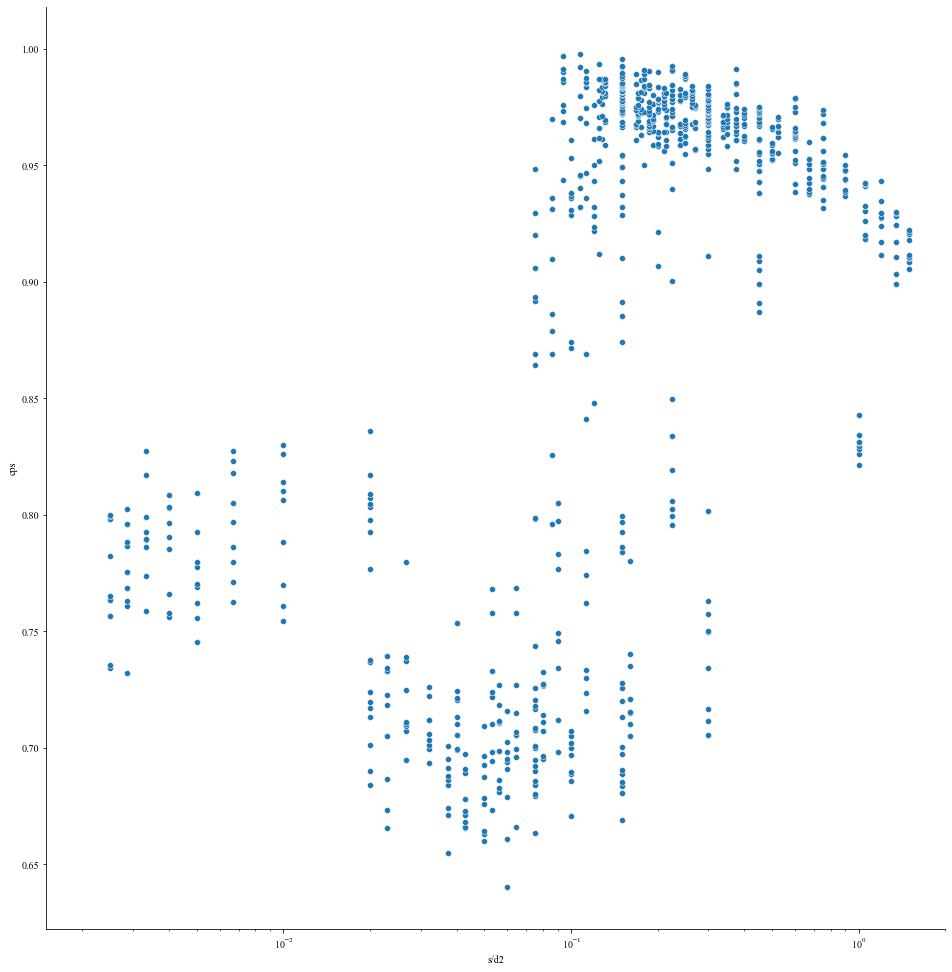

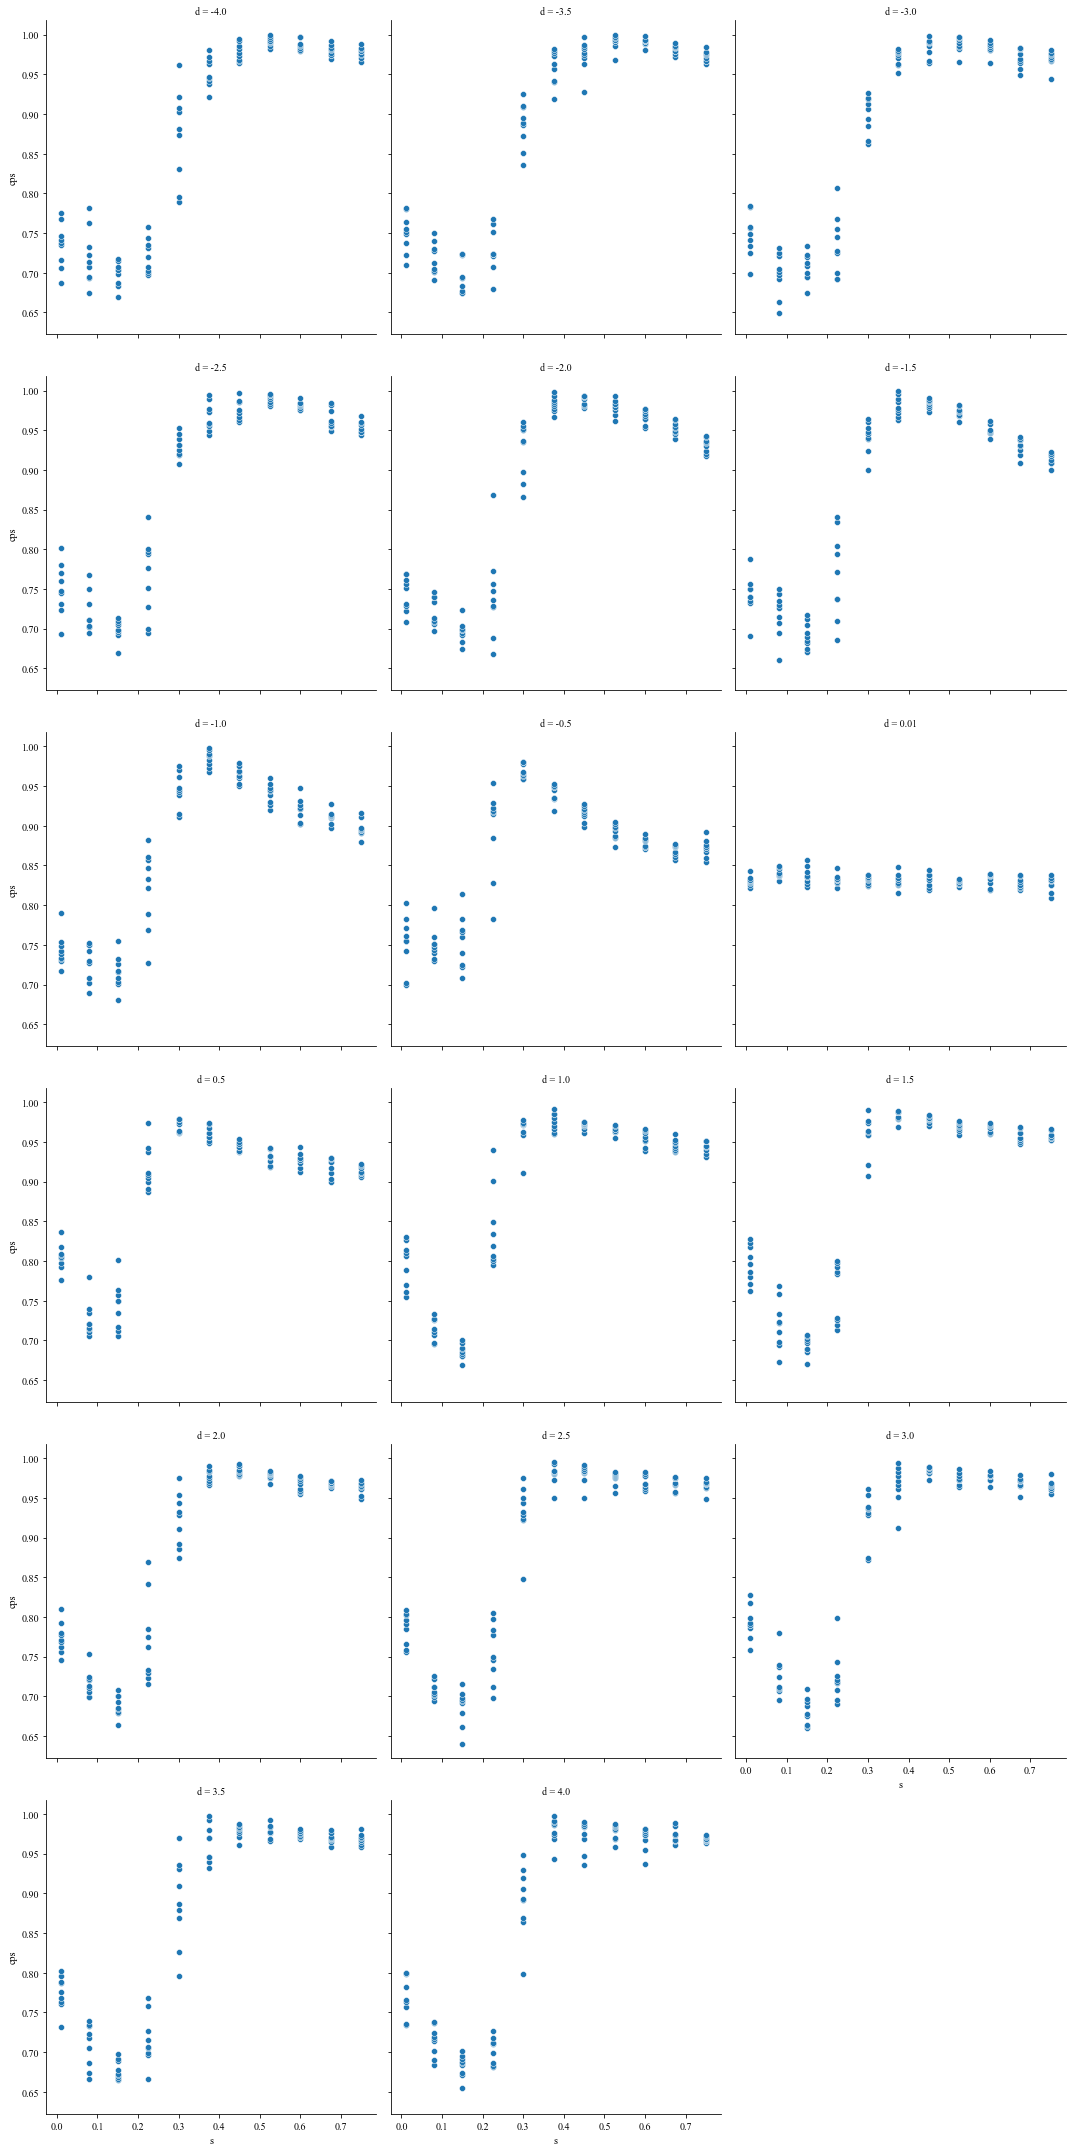

In [12]:
sns.relplot(data, x="s/d2", y="cps", kind="scatter").fig.set_size_inches(15,15)
plt.xscale("log")
plt.xlim(0,2)

sns.relplot(data, x="s", y="cps", kind="scatter", col="d", col_wrap=3)

/tmp/ipykernel_130124/3407876781.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.displot(data, x="cps", element="step", stat="probability", palette=["red", "green", "blue"]).fig


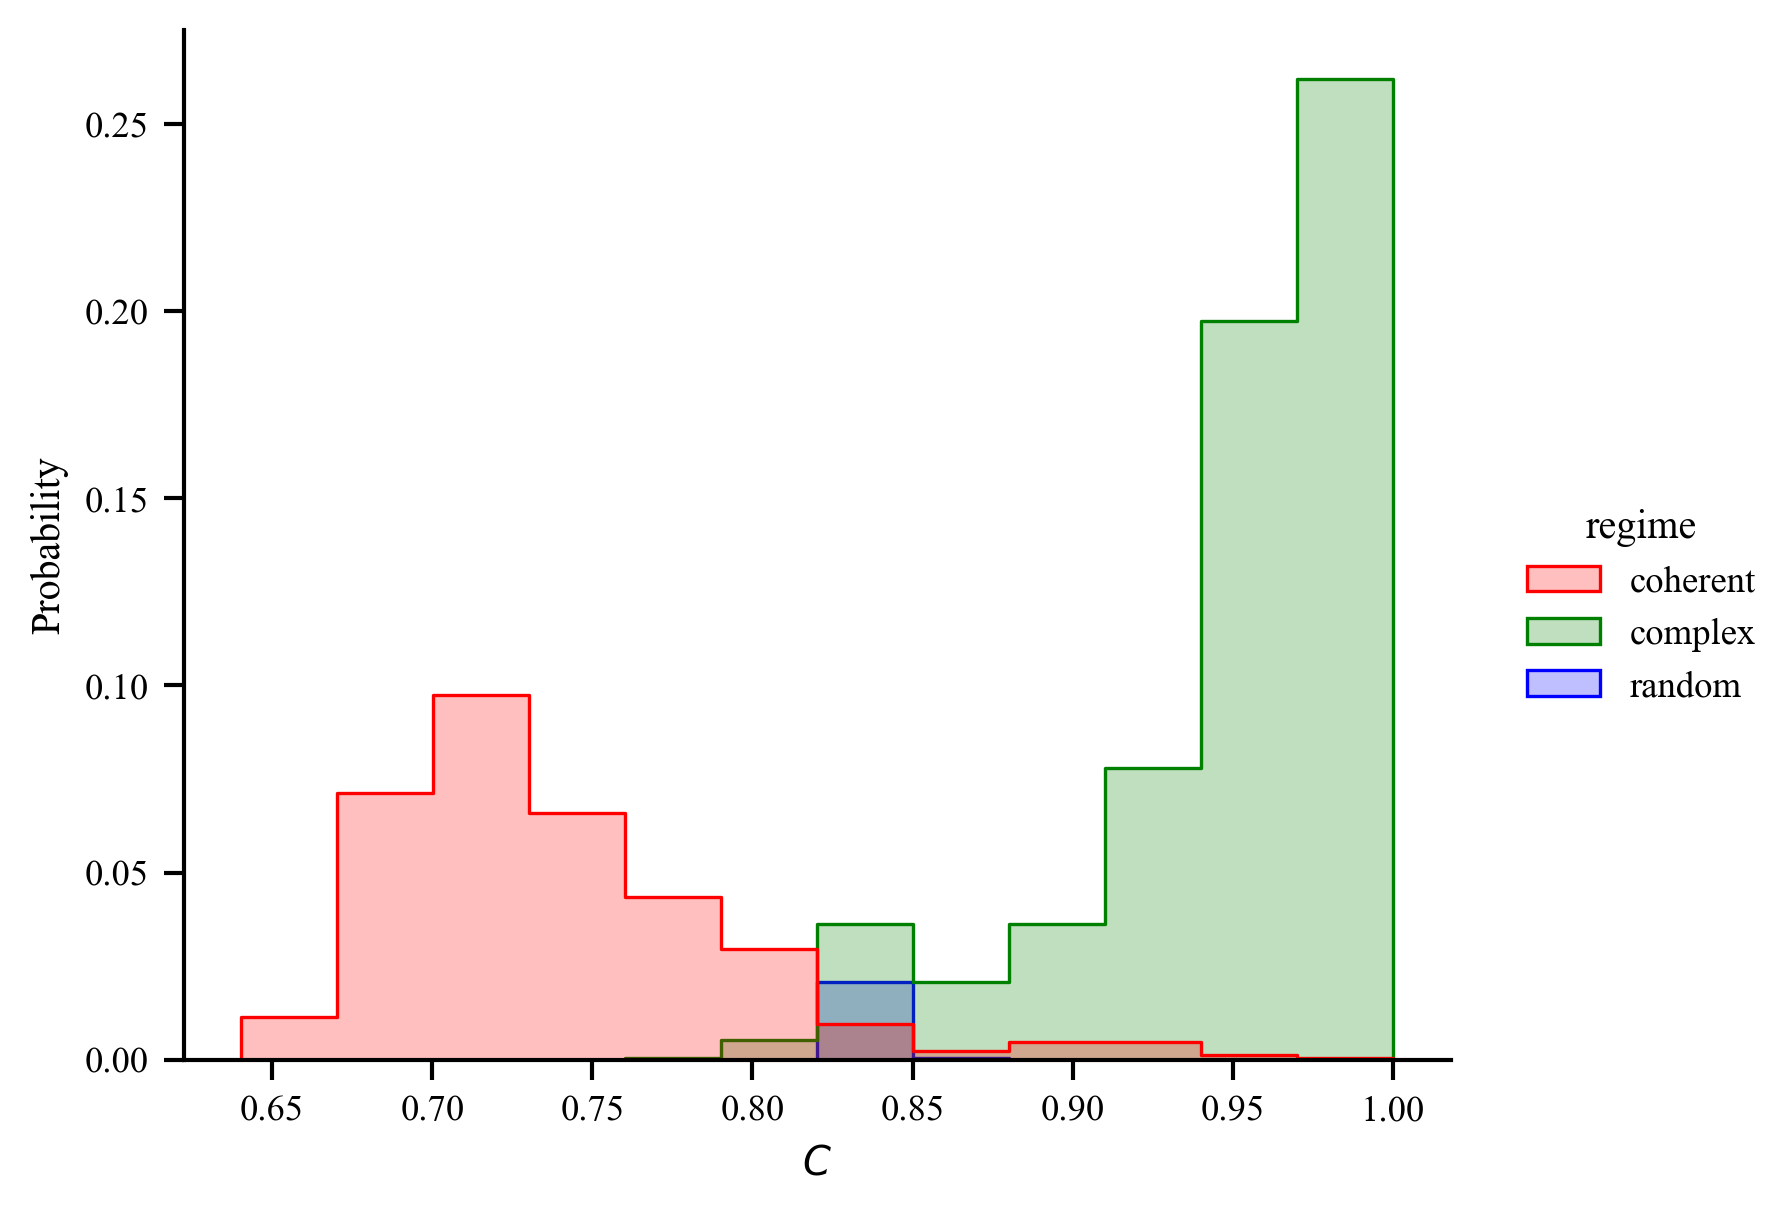

<Figure size 432x288 with 0 Axes>

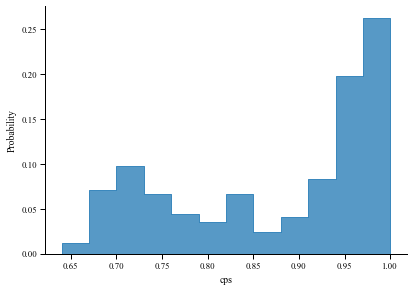

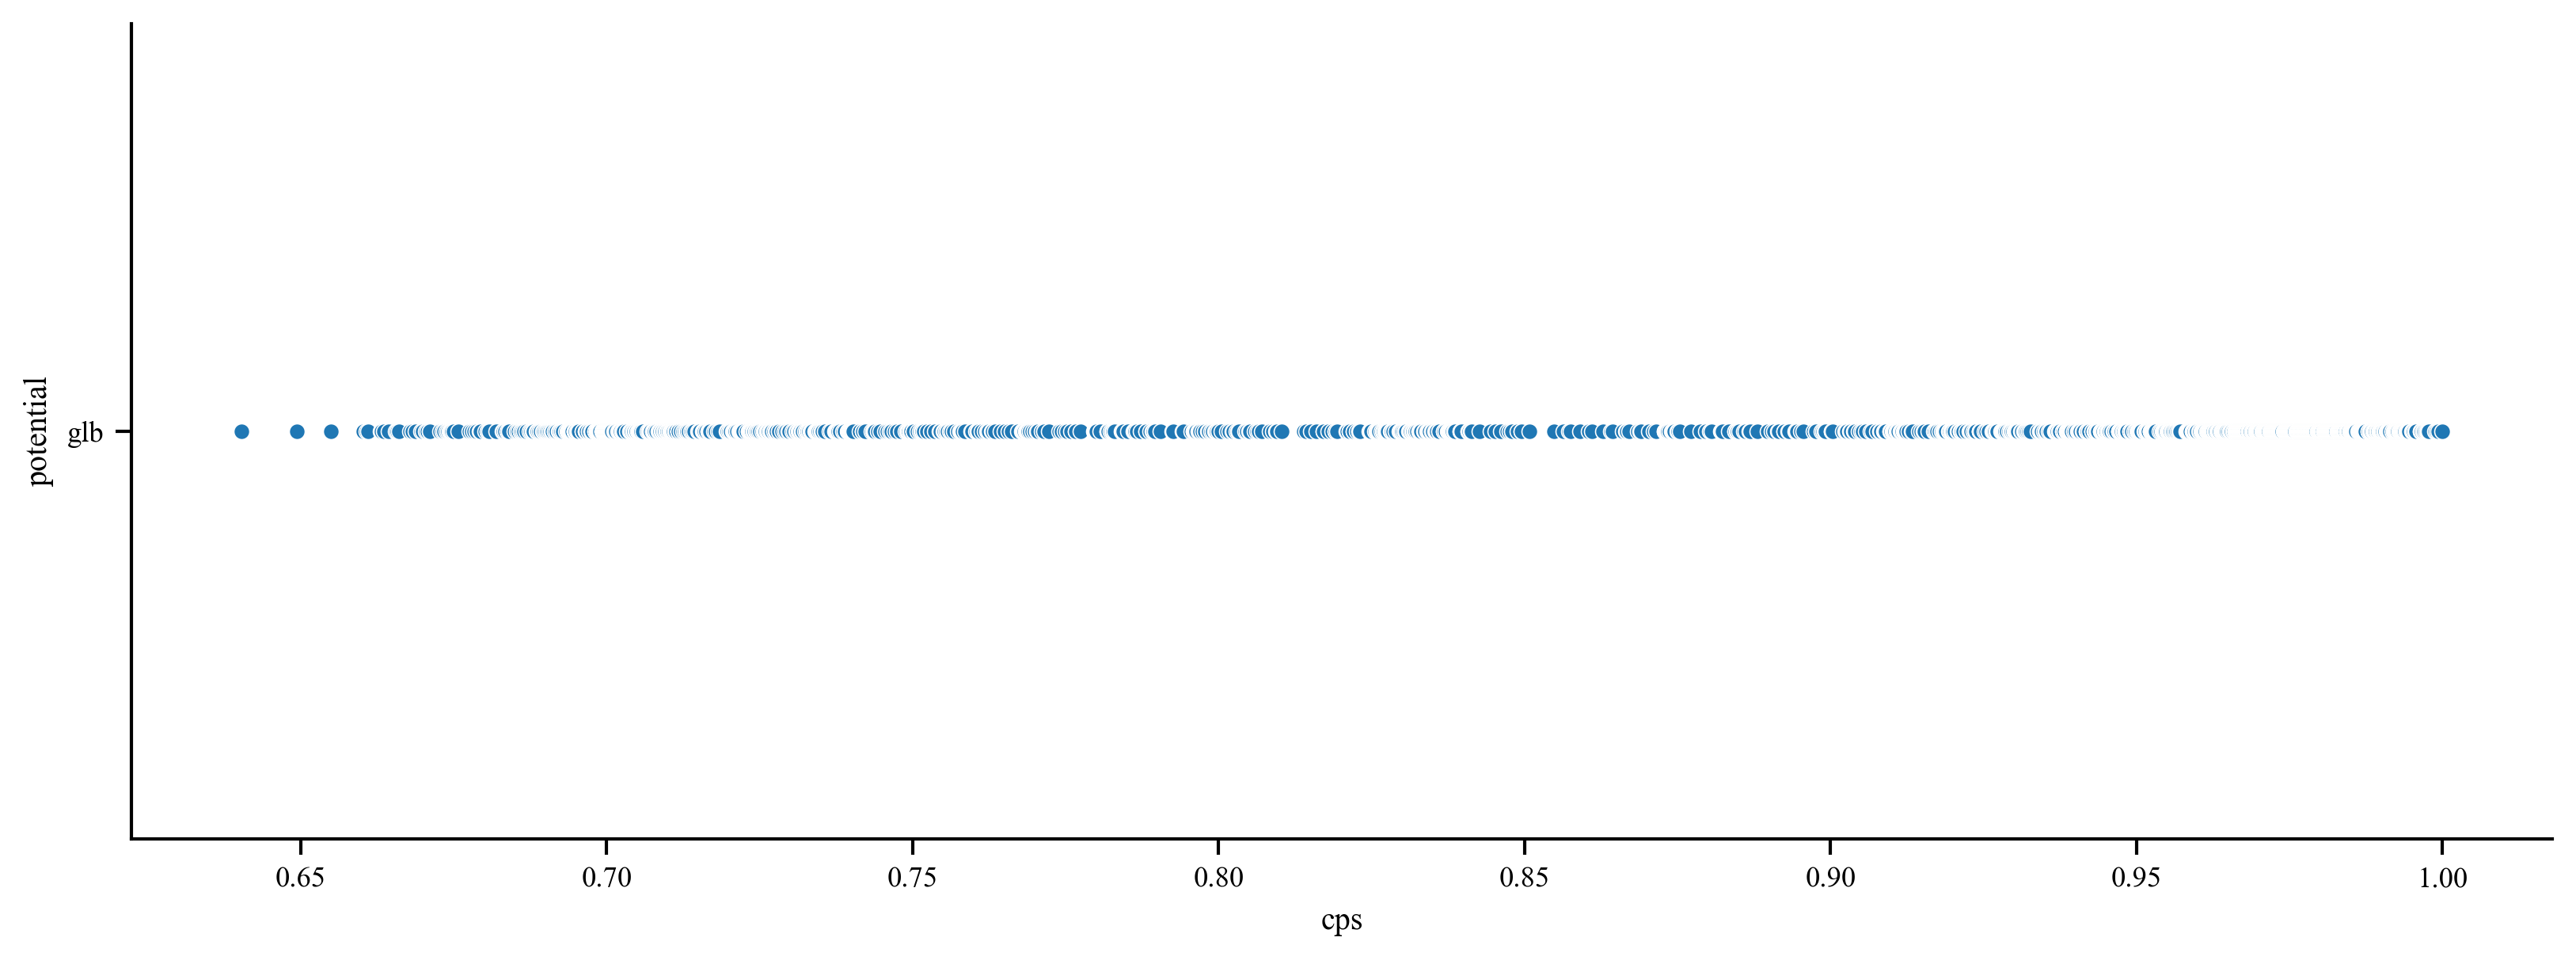

In [22]:
def classifyRegime(row):
    if row.s < 0.3 and row.d != 0.01: # coherent
        return "coherent"
    elif row.s >= 0.30 and d != 0.01: # complex
        return "complex"
    elif row.d == 0.01: # random
        return "random"

data["regime"] = data.apply(classifyRegime, axis=1)

sns.set_context("paper")
# ax = plt.figure(figsize=(10,10), dpi=300)
# plt.dpi(300)
fig = sns.displot(data, x="cps", hue="regime", element="step", stat="probability", palette=["red", "green", "blue"]).fig
fig.set_size_inches(6,4)
fig.set_dpi(300)
plt.gca().set_xlabel("$C$")

plt.figure()
fig = sns.displot(data, x="cps", element="step", stat="probability", palette=["red", "green", "blue"]).fig
fig.set_size_inches(6,4)

sns.set_context("paper")
data=data.sort_values("cps")
fig = sns.relplot(data, x="cps", y="potential").fig
fig.set_size_inches(12,4)
fig.set_dpi(300)

0.5635253443574255 [0.3499766  0.00051349] 0.7431288847388379


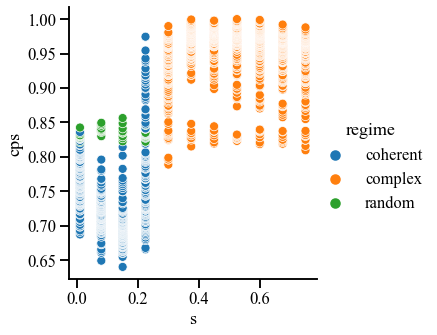

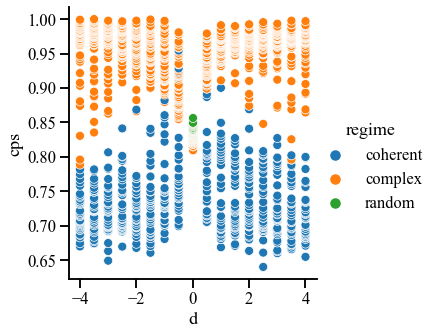

In [14]:
sns.set_context("talk")
sns.relplot(data, x="s", y="cps", hue="regime")
sns.relplot(data, x="d", y="cps", hue="regime")

from sklearn import linear_model
X = data.loc[:, ["s","d"]]
y = data["cps"]
reg = linear_model.LinearRegression().fit(X, y)
print(reg.score(X, y), reg.coef_, reg.intercept_)

array([[0.        , 0.00903909, 0.01462314, ..., 0.05409818, 0.05412921,
        0.05444624],
       [0.        , 0.00558405, 0.00903909, ..., 0.04505909, 0.04509012,
        0.04540715],
       [0.        , 0.00530081, 0.00558405, ..., 0.03947504, 0.03950606,
        0.0398231 ],
       ...,
       [0.        , 0.00025573, 0.00035656, ..., 0.01171469, 0.01183329,
        0.01184725],
       [0.        , 0.00025573, 0.00061228, ..., 0.01197042, 0.01208902,
        0.01210298],
       [0.        , 0.00062318, 0.00087891, ..., 0.0125936 , 0.0127122 ,
        0.01272615]])

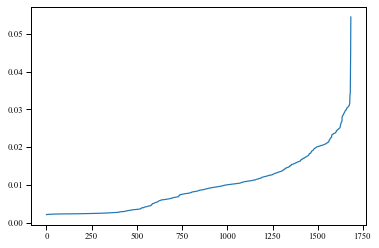

In [74]:
# figure out eps value based on min_samples
from sklearn.neighbors import NearestNeighbors
X = np.array(data["cps"]).reshape(-1,1)
nns = NearestNeighbors(n_neighbors=101).fit(X)
dists, _ = nns.kneighbors(X)
display(dists)
plt.plot(np.sort(dists[:,100], axis=0))

In [75]:
from sklearn.cluster import DBSCAN as db
clusters = db(eps=0.015, min_samples=100).fit(X).labels_
clusters = list(clusters)

for i in range(len(clusters)):
    if int(clusters[i]) == -1:
        clusters[i] = "noise"
    else:
        clusters[i] = f"cluster {clusters[i]}"
# print(list(clusters))
data["C_cluster"] = clusters
data

,potential,dnn,dim,s,d,energySMSE,Float64profile,cps,sum,s/d2,regime,C_cluster
47,glb,2.0,56.568542,0.150,2.5,2.425107,"[69.53846153846153, 13.846153846153847, 4.6153...",0.640290,186.307692,0.060000,coherent,noise
396,glb,2.0,56.568542,0.080,-3.0,0.911710,"[63.07692307692308, 13.23076923076923, 4.92307...",0.649330,181.153846,-0.026667,coherent,noise
50,glb,2.0,56.568542,0.150,4.0,3.962033,"[66.38461538461539, 12.615384615384615, 4.2307...",0.654914,183.769231,0.037500,coherent,noise
609,glb,2.0,56.568542,0.150,3.0,0.121171,"[69.23076923076923, 13.461538461538462, 4.7692...",0.660214,187.230769,0.050000,coherent,noise
767,glb,2.0,56.568542,0.080,-1.5,0.085032,"[62.15384615384615, 14.461538461538462, 5.6923...",0.660793,182.461538,-0.053333,coherent,noise
...,...,...,...,...,...,...,...,...,...,...,...,...
836,glb,2.0,56.568542,0.375,-2.0,1.140509,"[67.15384615384616, 23.615384615384617, 14.307...",0.997753,200.000000,-0.187500,complex,cluster 2
703,glb,2.0,56.568542,0.600,-3.5,15.904066,"[74.0, 28.0, 16.076923076923077, 12.3076923076...",0.998765,200.000000,-0.171429,complex,cluster 2
687,glb,2.0,56.568542,0.525,-4.0,1.435156,"[74.0, 25.384615384615383, 15.923076923076923,...",0.999121,200.000000,-0.131250,complex,cluster 2
461,glb,2.0,56.568542,0.375,-1.5,2.435372,"[77.38461538461539, 27.0, 15.153846153846153, ...",0.999377,200.000000,-0.250000,complex,cluster 2


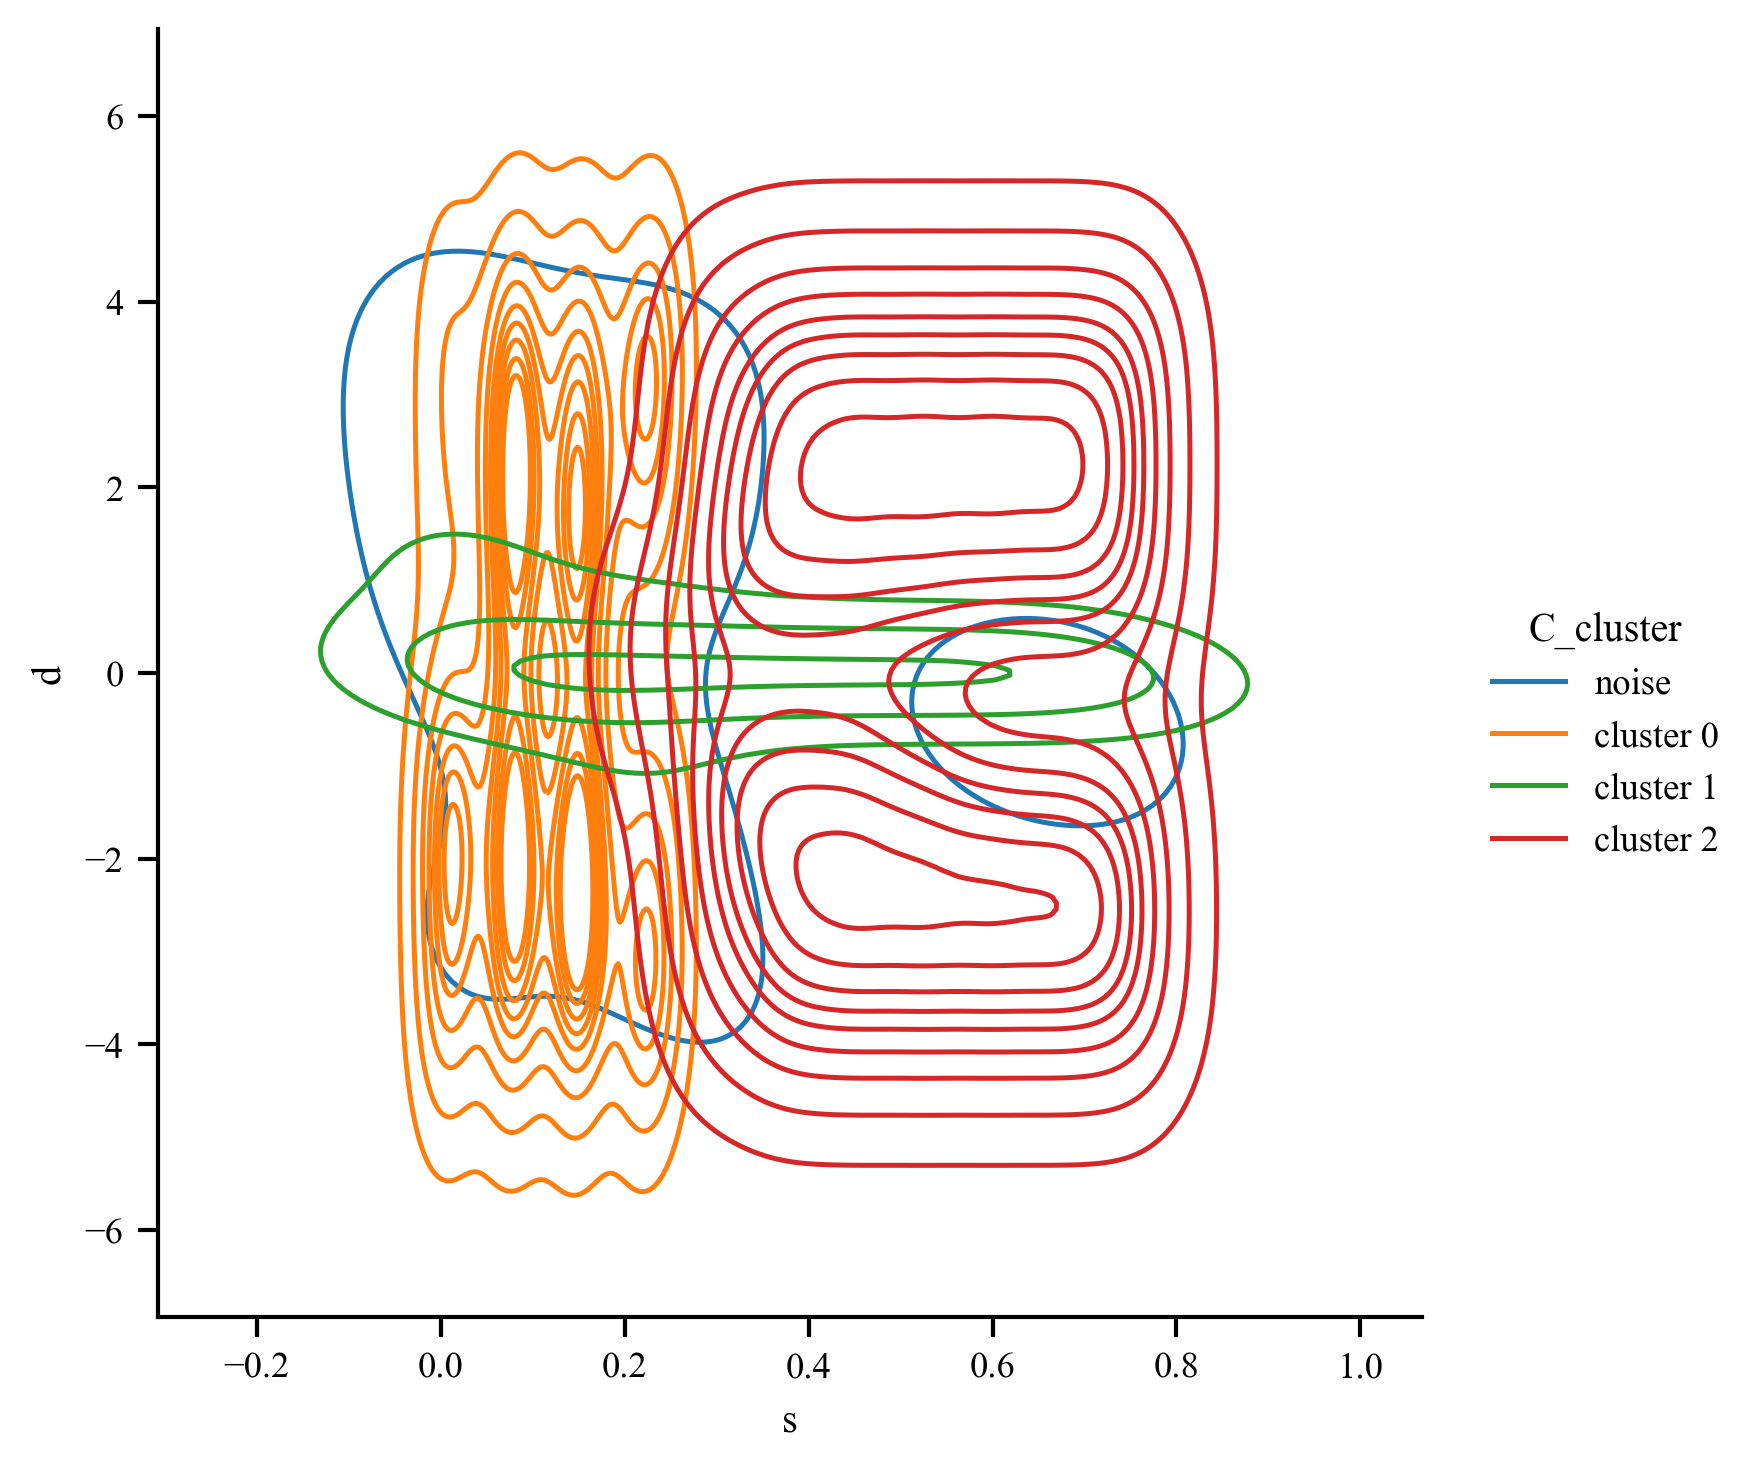

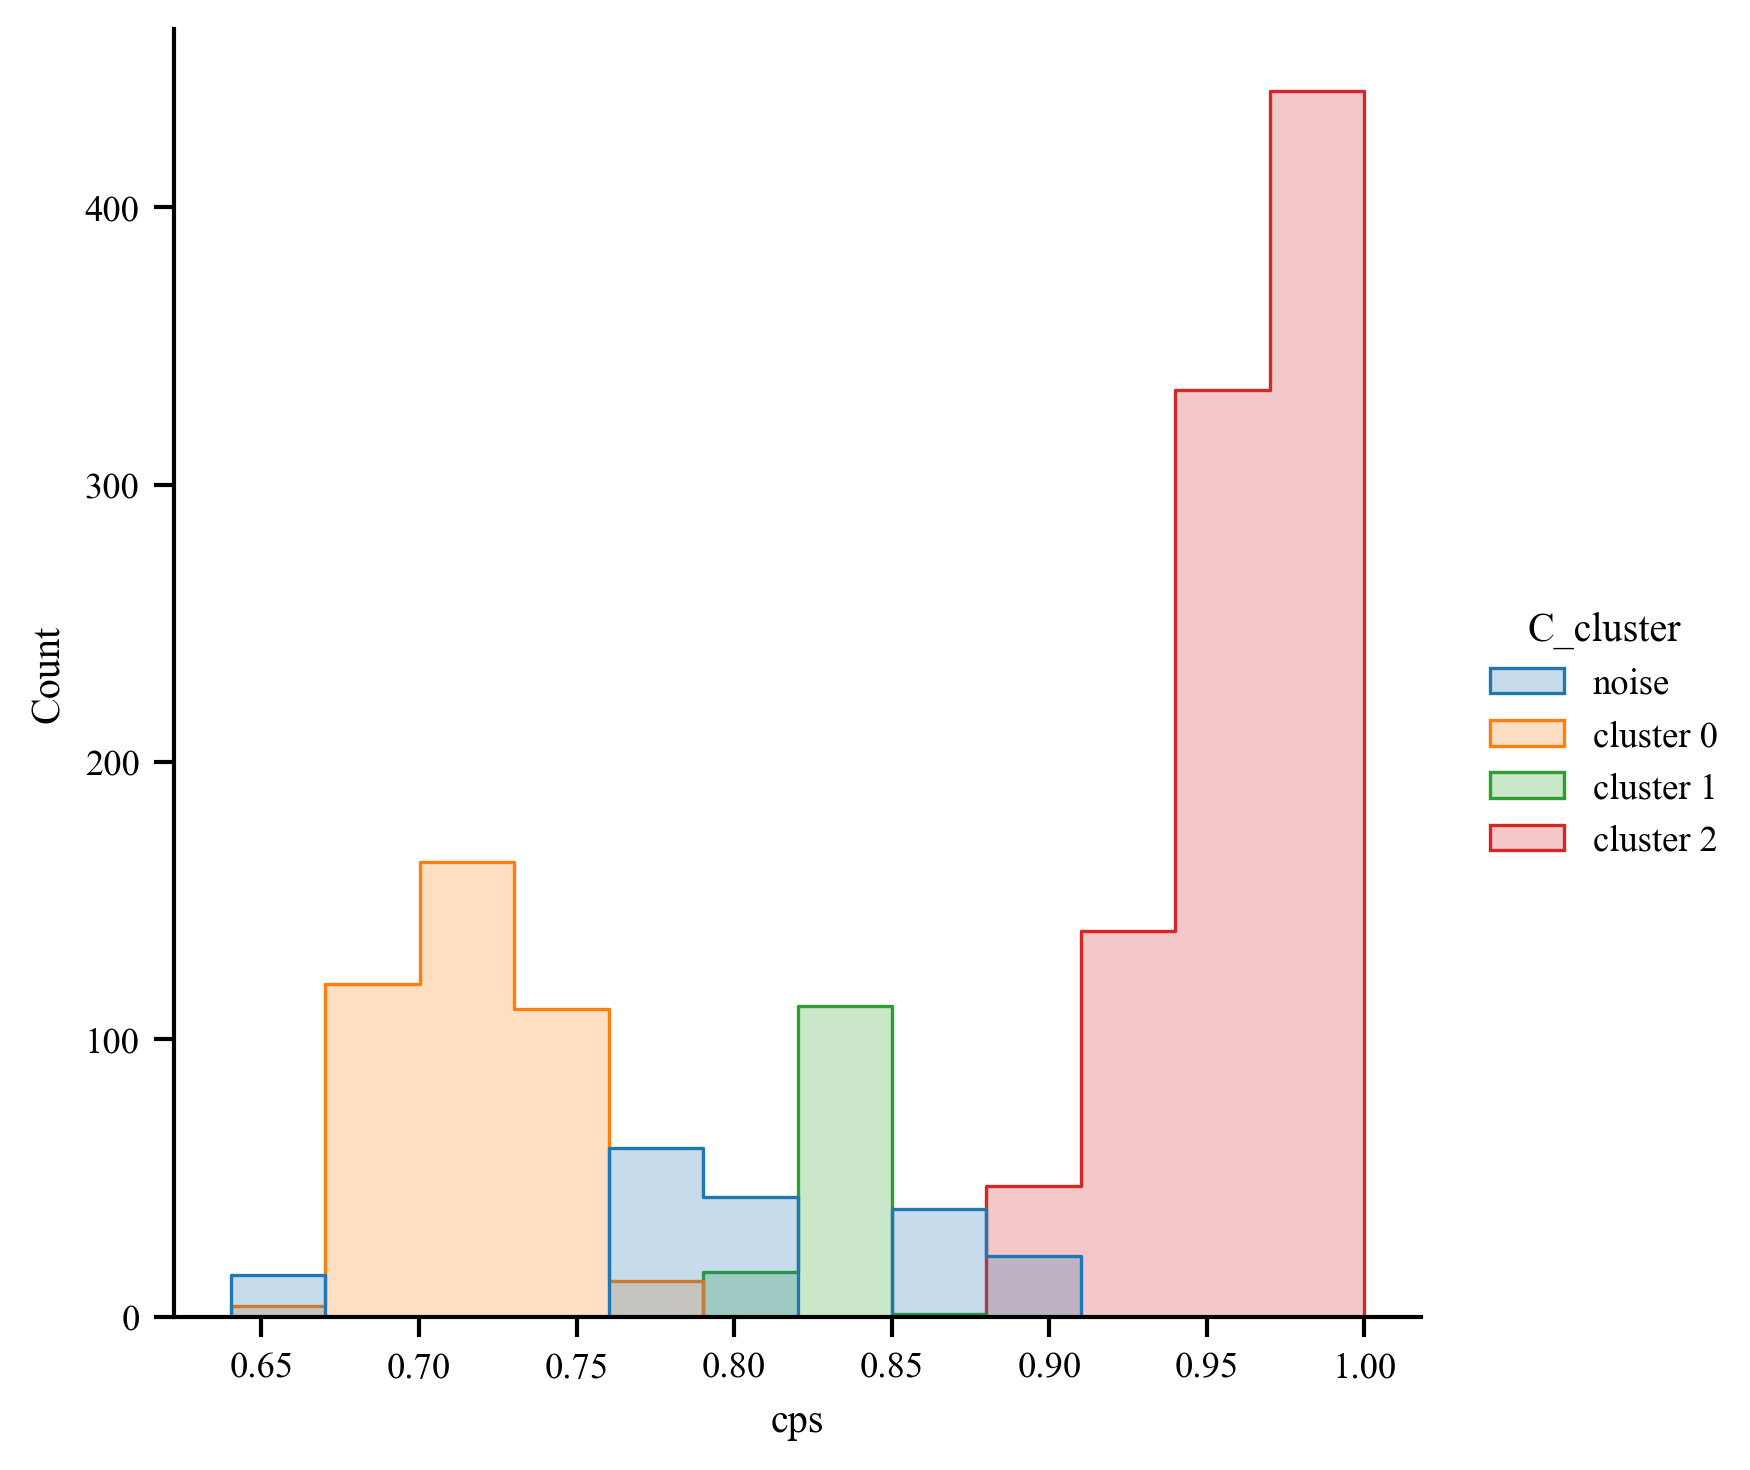

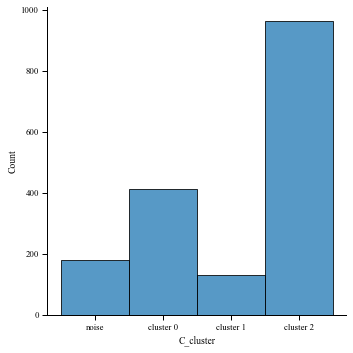

In [76]:
sns.displot(data, x="s", y="d", hue="C_cluster", kind="kde").fig.set_dpi(300)
sns.displot(data, x="cps", hue="C_cluster", element="step").fig.set_dpi(300)
sns.displot(data, x="C_cluster")